In deep learning, before we build powerful neural networks, we must first understand their most basic form: the **linear model**.  
Think of this section as our launchpad —- the point where we first define the idea of a "model" in machine learning.

We'll explore:
- What linear regression is,
- How it relates to neural networks,
- And how it applies to real-world problems like predicting concrete strength.

#### **What is Linear Regression?**

**Linear regression** is one of the simplest—and most important—techniques in supervised learning.

It models the relationship between **inputs** and **outputs** by assuming a **straight-line relationship** between them.

Mathematically, this is expressed as:

$$
\hat{y} = XW + b
$$

Where:
- $X$ = Input features (tensor)  
- $W$ = Weights (learnable parameters)  
- $b$ = Bias term  
- $\hat{y}$ = Predicted output

Think of it like this:

> "We’re trying to find the best straight line that explains the relationship between what we know ($X$) and what we want to predict ($\hat{y}$)."

This is the starting point for all of deep learning—even the most complex neural networks are built from stacks of linear transformations like this.

#### **Connection to Neural Networks**

What happens if we take this linear model and place it inside a neural network?

Actually, a **neural network with no hidden layers and no activation functions** behaves **exactly like a linear regression model**.  
It computes:

$$
\hat{y} = XW + b
$$

No non-linearity, no depth—just a direct, weighted transformation of inputs.

> **Key Insight**:  
> Linear models are the *core units* of deep learning.  
> What makes neural networks powerful is that we **stack** these units and introduce **non-linear functions** between them.

In this notebook, we’ll start from this fundamental building block and eventually expand toward more complex networks.

#### **Flow of a Linear Model**

**Input Features** ($X$)  
⬇️  
**Weighted Sum** ($XW$)  
⬇️  
**Add Bias** ($+b$)  
⬇️  
**Prediction** ($\hat{y}$)


#### **Real-World Applications of Linear Regression**

Linear regression is not just a teaching example—it powers real applications:

- 🏠 **Predicting house prices** based on area, location, and age
- 👨‍💼 **Estimating salary** based on experience and education
- 🏗️ **Predicting concrete strength** based on material composition (our case study!)

> **Reflect & Connect:**  
> Think about other real-world examples where you expect a *linear relationship*—can you name one?

In the next section, we’ll take this mathematical idea and express it as code using PyTorch tensors.

Time to answer **Multiple Choice questions 1.2.1.1 & 1.2.1.2**!

---

## 2. Mathematical Formulation of a Linear Model

Now that we understand the intuition behind linear regression, let’s look more closely at the **mathematical structure**.

We know the prediction rule is:

$$
\hat{y} = XW + b
$$

But what do these symbols actually mean?

#### **Breaking Down the Equation**

| Symbol      | Meaning                      | Typical Shape        |
|-------------|------------------------------|-----------------------|
| $X$         | Input features (matrix)      | $(n, d)$ = n samples × d features |
| $W$         | Weights (vector/matrix)      | $(d, 1)$              |
| $b$         | Bias (scalar or vector)      | Scalar or $(n, 1)$    |
| $\hat{y}$   | Predicted outputs            | $(n, 1)$              |

So this model performs a **linear transformation** of the inputs, followed by a **bias shift**.  
The multiplication $XW$ gives us a **weighted sum of features**, and $b$ lets us adjust the output.

- $XW$: **Weighted Sums** → shape $(n \times 1)$  

#### **Example: Manual Calculation**

Let’s compute a concrete example with:
- 3 data points
- 2 input features per point

$$
X =
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix},
\quad
W =
\begin{bmatrix}
0.5 \\
1.5
\end{bmatrix},
\quad
b = 2
$$

Then:

$$
\hat{y} = XW + b =
\begin{bmatrix}
1 \cdot 0.5 + 2 \cdot 1.5 + 2 \\
3 \cdot 0.5 + 4 \cdot 1.5 + 2 \\
5 \cdot 0.5 + 6 \cdot 1.5 + 2
\end{bmatrix}
=
\begin{bmatrix}
6 \\
11 \\
16
\end{bmatrix}
$$

> **Reflection Prompt:**  
> Why must $X$ and $W$ have these exact shapes?  
> What would go wrong if $W$ had shape (1, d) instead of (d, 1)?

This is a key insight when building models with PyTorch—**tensor shapes must match** for the operations to work!

In the next section, we’ll move from this math into actual code: we’ll define a `predict()` function that performs this operation using PyTorch tensors.

Time to answer **Multiple Choice questions 1.2.2.1**!

---

## 3. Predict Function on a Tiny Dataset

So far, we've defined our model mathematically as:

$$
\hat{y} = XW + b
$$

Now it's time to **bring this equation to life** using PyTorch.

To keep things intuitive, we’ll start with a **tiny toy dataset** that’s easy to follow.  
This will help us understand how predictions are made using matrix multiplication.

We’ll:
1. Create a simple dataset `X` with a few input values  
2. Manually define parameters `W` and `b`  
3. Implement a `predict(X)` function  
4. Compute predictions $\hat{y}$ using our linear model

#### **Before the Code: What's Happening?**

Let’s summarize the steps:

- Create:
  - A 4-sample input tensor `X` (1D feature)
  - A target output `Y` that follows a linear pattern
- Initialize:
  - A simple weight `W = 0.5`
  - A bias `b = 0`
- Define a function:
  - `predict(X)` that returns $XW + b$
- Print the predicted output

This helps build intuition for how weights and bias **shape the model’s output**—and it sets the stage for learning.


In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Tiny toy dataset
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # Inputs
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])  # Ground truth

# Step 2: Manually initialized weight and bias
W = torch.tensor([[0.5]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# Step 3: Define predict function (ŷ = XW + b)
def predict(X):
    return torch.matmul(X, W) + b

# Step 4: Make predictions
y_pred = predict(X)

# Step 5: Show results
print("Predictions:")
print(y_pred)

Predictions:
tensor([[0.5000],
        [1.0000],
        [1.5000],
        [2.0000]], grad_fn=<AddBackward0>)


> What did we just see?

The model applied a simple **linear transformation** to the inputs:
- Multiply each input by 0.5
- Add 0

This produces outputs: `[0.5, 1.0, 1.5, 2.0]` which are **significantly lower than** the true targets: `[2.0, 4.0, 6.0, 8.0]`

✅ This highlights that our model parameters **are not yet optimal**.  
Later, we’ll learn how to automatically update `W` and `b` using gradient descent to **minimize the difference** between predicted and actual values.

---

#### 🛠️ Code Task 1.2.3.1:  Linear Prediction with PyTorch

You are given a small dataset of input-output pairs:

- Inputs: $X = [[1.0], [2.0], [3.0], [4.0]]$  
- Targets: $Y = [[2.0], [4.0], [6.0], [8.0]]$

Your task is to:

1. Manually initialize:
   - A weight tensor $W = [[0.5]]$ with `requires_grad=True`  
   - A bias tensor $b = [0.0]$ with `requires_grad=True`
2. Define a function `predict(X)` that returns $XW + b$
3. Compute the predicted output: $\hat{y} = \text{predict}(X)$ and assign it to the variable `y_pred`
4. Print the result

Make sure to assign all values to the correct variable names as described.

In [3]:
# Step 1: Toy dataset
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Step 2: Manually initialized parameters
W = torch.tensor([
    [0.5]
], requires_grad = True)
b = torch.tensor([0.0], requires_grad = True)

# Step 3: Define the predict function
def predict(X):
    return torch.matmul(X, W) + b

# Step 4: Compute predictions
y_pred = predict(X)

# Step 5: Print predictions
print("Predictions:")
print(y_pred)

Predictions:
tensor([[0.5000],
        [1.0000],
        [1.5000],
        [2.0000]], grad_fn=<AddBackward0>)


## 4. Loss Functions for Regression

Once a model makes predictions, we need a way to **measure how well it's doing**.  
That’s where a **loss function** comes in.

In supervised learning, a loss function compares the model's predictions $\hat{y}$ to the true target values $y$ and returns a single number—a **score** that tells us how far off we are.

> 🎯 The goal of training is to **minimize this loss**.

#### **Mean Squared Error (MSE)**

For regression tasks, the most common loss function is the **Mean Squared Error (MSE)**.

It is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ = the actual value  
- $\hat{y}_i$ = the predicted value  
- $n$ = number of examples

#### **How It Works:**

1. Take the **difference** between prediction and actual value  
2. **Square** the difference (to penalize large errors more strongly)  
3. **Average** across all data points

This gives us a single loss value representing overall prediction error.

#### **Code Preview: What Will We Do?**

We’ll:
- Define a custom `mse_loss()` function in PyTorch
- Pass in a small set of predictions and true values
- Compute the MSE and print the result

This is a good **sanity check** to verify our understanding of the loss calculation.


In [4]:
def mse_loss(prediction, targets):
    try:
        if len(prediction) == len(targets):
            squared_diff = sum((prediction - targets) ** 2)
            return squared_diff / len(targets)
    except Exception as e:
        print(f"prediction and target must be of same length") 
        return None

mse_loss(Y, y_pred)

tensor([16.8750], grad_fn=<DivBackward0>)

> What Did We See?

Our function computed the **average squared difference** between predicted and actual values.  
This tells us how far off the model is—**lower MSE = better performance**.

In our example, we get a small positive number showing modest prediction error.

#### **Aside: Other Common Regression Losses**

- **Mean Absolute Error (MAE):** Uses absolute differences; more robust to outliers  
- **Huber Loss:** Combines MSE and MAE behavior; often used when we want stability with outliers


In a upcoming section, we’ll use this MSE function inside a **training loop** to guide the model in updating its parameters (ϕ).

---

#### 🛠️ Code Task 1.2.4.1: Compute Mean Squared Error (MSE) with 1D Vectors

Implement and use a custom Mean Squared Error function using PyTorch.

Your task is to:

1. Define a function named `mse_loss(predictions, targets)` that computes the MSE using the formula:  
   $$
   \text{MSE} = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2
   $$

2. Use the following tensors:  
   - $Y_{\text{true}} = [3.0, 5.0, 7.0, 9.0, 11.0]$  
   - $Y_{\text{pred}} = [2.5, 5.5, 6.0, 9.0, 12.0]$

3. Compute the MSE and assign the result to a variable named `loss`.

4. Print the result using `loss.item()`.


In [5]:
# Step 1: Define MSE loss function
def mse_loss(predictions, targets):
    return torch.mean((predictions - targets) ** 2)

# Step 2: Define targets and predictions
Y_true = torch.tensor([3.0, 5.0, 7.0, 9.0, 11.0])
Y_pred = torch.tensor([2.5, 5.5, 6.0, 9.0, 12.0])

# Step 3: Compute loss
loss = mse_loss(Y_true, Y_pred)

# Step 4: Print the result
print("MSE Loss:", loss.item())

MSE Loss: 0.5


## 5. Preparing the Data and Model

Now that we’ve defined how the model works and how to measure its performance, it’s time to **prepare the data and the model parameters** for training.

This is a critical setup step. A model with poor data preparation or unstable initialization will struggle to learn, even if the math is correct.

We’ll:
1. Load the Concrete dataset
2. Normalize the input features for stability
3. Split the data into training and test sets
4. Initialize the model parameters: weights `W` and bias `b`

#### **Data & Model Setup: High-Level Plan**

```text
Load CSV
    ↓
Extract inputs & targets
    ↓
Standardize features (mean=0, std=1)
    ↓
Split into 80% train, 20% test
    ↓
Initialize W and b with gradient tracking
```

Let’s now implement this in code.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
# read data
data = pd.read_csv('Project.csv')

# separate features as needed
inputs = data.iloc[:,:-1].values
target = data.iloc[:,-1].values.reshape(-1, 1)

# Normalize input features
scaler = StandardScaler()
input_scaled = scaler.fit_transform(inputs)

# Convert both input and target features to tensor
inputs_tensor = torch.tensor(input_scaled, dtype = torch.float32)
target_tensor = torch.tensor(target, dtype = torch.float32)

n_samples = len(inputs_tensor)
indices = torch.randperm(n_samples)
split_idx = int(n_samples * 0.8)

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train, X_test, y_train, y_test = inputs_tensor[train_indices], inputs_tensor[test_indices], target_tensor[train_indices], target_tensor[test_indices]


# 6. Initialize model parameters
num_features = X_train.shape[1] # number of feature
W = torch.randn((num_features, 1), requires_grad=True)
W.data *= 0.01 # scale down initial values
b = torch.zeros((1,), requires_grad = True)

print(b)
print(W.shape)
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)


tensor([0.], requires_grad=True)
torch.Size([9, 1])
torch.Size([824, 9]) torch.Size([824, 1])

torch.Size([206, 9]) torch.Size([206, 1])


The input features vary widely in scale—e.g., cement can be over 500, while superplasticizer is often below 5.

These differences lead to:
- Large gradients
- Exploding updates
- Slow or unstable training

✅ Standardization ensures:
- Mean = 0
- Standard deviation = 1  
And helps the model **learn more reliably**.

#### **Why Split the Dataset?**

To evaluate how well the model **generalizes**, we set aside a **test set** that the model never sees during training.

- **Training set**: used to update weights  
- **Test set**: used to measure generalization

We use a typical **80-20 split**.

#### **Why Initialize with Small Weights?**

If weights are too large at the beginning, the model might:
- Produce massive outputs
- Suffer from exploding gradients

We initialize:
- `W` as small random values (`~N(0, 0.01)`)
- `b` as zero

Also, by setting `requires_grad=True`, PyTorch will track gradients for these variables during training.

---

## 6. Understanding Parameters in PyTorch

In the previous section, we initialized two model parameters: **weights** `W` and **bias** `b`.

Let’s now take a closer look at what they represent, how they are shaped, and how PyTorch tracks their updates during training.

#### **What Do the Parameters Represent?**

- **Weights `W`**  
  Each weight controls the influence of one input feature on the model’s output.
  > “How much does this feature matter in predicting concrete strength?”

- **Bias `b`**  
  A constant that shifts all predictions up or down—like adjusting the baseline.

Together, these parameters define the **linear function**:
$$
\hat{y} = XW + b
$$

#### **Understanding the Shapes**

Since we have 8 input features, our parameter shapes must match the matrix multiplication rules:

| Parameter | Shape     | Description                        |
|-----------|-----------|------------------------------------|
| `X`       | (n, 8)    | `n` samples, each with 8 features  |
| `W`       | (8, 1)    | One weight per feature             |
| `b`       | (1,)      | A single scalar bias               |
| $\hat{y}$ | (n, 1)    | One predicted value per example    |

#### **Shape Flow Schematic**

```text
Input X:           (n × 8)
Weights W:         (8 × 1)
-------------------------
XW result:       (n × 1)
+ Bias b:        (broadcasted to n × 1)
-------------------------
Predictions ŷ:   (n × 1)
```
✅ PyTorch handles this **broadcasting automatically** when we add `b`.

#### **Why `requires_grad=True`?**

To train the model using **gradient descent**, PyTorch needs to compute the **gradients of the loss** with respect to the parameters:

$$
\boldsymbol{\phi} = \{W, b\}
$$

We tell PyTorch which tensors to **track for gradients** by setting:
```python
W = torch.randn((8, 1), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)
```

This enables Automatic Differentiation in PyTorch: PyTorch builds a **computation graph** behind the scenes and stores all operations involving `W` and `b`.  
When we later call `.backward()` on the loss, PyTorch uses the **chain rule** to compute:

$$
\nabla_\phi L
$$

This gives us the **gradient of the loss** with respect to each parameter.

#### **Summary**

- `W` and `b` are the **only parameters** in this model  
- Their shapes must align with the **input-output structure**  
- With `requires_grad=True`, PyTorch **tracks gradients** to help reduce the loss  

In the next section, we’ll introduce **gradient descent** — the core algorithm that uses these gradients to **update `W` and `b`**

---

## 7. Gradient Descent – Conceptual Overview

In the previous section, we saw that PyTorch can track how the loss depends on each parameter ϕ.  
But knowing the gradient is only part of the story—we still need to use that information to **actually improve the model**.

That’s where **gradient descent** comes in.

#### **The Goal: Minimize the Loss**

Our model is only useful if it makes **accurate predictions**.  
To measure how far off it is, we use a **loss function** $L[\phi]$, which outputs a scalar value—  
**the total error across the training data**.

> 🎯 Our goal is to **find the values of ϕ that make this loss as small as possible.**

This is called an **optimization problem**.

#### **The Role of the Gradient**

The gradient is like a compass—it tells us:

- 📉 **Which direction** will reduce the loss (the sign of the derivative)
- 📏 **How steeply** the loss changes (the magnitude)

Each parameter has its own gradient:
- $\frac{\partial L}{\partial W}$ tells us how much to change the weights
- $\frac{\partial L}{\partial b}$ tells us how much to change the bias


#### **The Gradient Descent Rule**

We update the parameters using the following rule:

$$
\phi \leftarrow \phi - \alpha \cdot \nabla_\phi L
$$

Let’s unpack it:

| Symbol         | Meaning                                |
|----------------|----------------------------------------|
| $\phi$         | A model parameter (e.g., W or b)       |
| $\nabla_\phi L$| Gradient of the loss wrt. that parameter |
| $\alpha$       | Learning rate (how big a step we take) |

#### **Step-by-Step Update (Per Parameter)**

```text
1. Compute loss  L[ϕ]      ← How far off are our predictions?
2. Compute gradient ∇ϕ L   ← How should we change W and b?
3. Take a step:            ← Update each parameter:
   ϕ ← ϕ - α ⋅ ∇ϕ L
4. Repeat for many epochs
```
```text
   X, y
    ↓
 forward pass: compute ŷ = XW + b
    ↓
     loss = MSE(ŷ, y)
    ↓
 backward pass: compute gradients ∇W, ∇b
    ↓
 update: 
   W ← W - α ⋅ ∇W
   b ← b - α ⋅ ∇b
```

#### **Choosing the Right Learning Rate**

The learning rate $\alpha$ controls **how fast** we move toward the minimum:

| Learning Rate ($\alpha$) | Behavior                      |
|--------------------------|-------------------------------|
| Too small                | Learns very slowly            |
| Too large                | Overshoots or diverges        |
| Just right               | Steady improvement in loss    |

✅ The **learning rate is a hyperparameter** — we choose it **before training**.

#### **Visual Intuition**

Imagine you're standing on a **hilly surface**, trying to reach the **lowest point**:

- The **gradient** tells you which way is downhill  
- The **learning rate** tells you how big each step should be  

📌 If steps are **too big**, you might **overshoot** or fall off a cliff  
📌 If steps are **too small**, you'll take forever to reach the valley

#### **Key Idea:**

- Gradients are **directional signals**, not solutions  
- We still need to decide **how to apply them** — that's what **gradient descent** gives us

✅ **In PyTorch**:

1. After computing the loss, we call `.backward()` to **populate gradients**  
2. Then we **manually update the parameters** using these gradients inside a **training loop**

Time to answer **Multiple Choice Questions 1.2.7.1 & 1.2.7.2**!

---

## 8. Training Loop – Manual Gradient Descent

Now that we understand the gradient descent update rule, it’s time to build a complete training loop and put all the moving parts together.

This is where learning *actually happens*.  
Our model starts with random weights and bias, and this loop will gradually adjust them to **minimize the loss** using the gradients.

#### **What Does a Training Loop Do?**

In every training **epoch** (iteration), we perform the following steps:

1. **Forward pass** – Compute predictions: $\hat{y} = XW + b$  
2. **Loss computation** – Measure how far off the predictions are  
3. **Backward pass** – Compute gradients via `.backward()`  
4. **Parameter update** – Adjust `W` and `b` using gradient descent  
5. **Gradient reset** – Clear old gradients before the next epoch

#### **Code block to be implemented later:**
```python

for epoch in range(epochs):
    # 1. Predict
    y_pred = predict(X_train)

    # 2. Compute loss
    loss = mse_loss(y_pred, y_train)

    # 3. Backpropagation
    loss.backward()

    # 4. Update weights
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    # 5. Reset gradients
    W.grad.zero_()
    b.grad.zero_()
```
#### **Why Use `torch.no_grad()`**

When updating `W` and `b`, we **don’t want PyTorch to track** these operations in the computation graph.  
Wrapping the update step in `torch.no_grad()` disables gradient tracking inside that block.

#### **Why Reset Gradients?**

By default, PyTorch **accumulates gradients** after each `.backward()` call.  
So we must **reset them manually** using:

```python
W.grad.zero_()
b.grad.zero_()
```
❗ If we don’t clear the gradients, PyTorch will add new gradients on top of the old ones, leading to incorrect updates during training.

✅ Let’s now implement the actual training loop below!

In [7]:
# set the learning rate and epochs
learning_rate = 0.001
epochs = 100

# loop over the range pf epochs
for epoch in range(epochs):
    # make predictions
    y_pred = predict(X_train)

    # compute loss
    loss = mse_loss(y_pred, y_train)

    # make backward propagation
    loss.backward()

    # update model parameters
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad
    # zero grad
    W.grad.zero_()
    b.grad.zero_()
    # print loss over 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")


Epoch 10: Loss = 1522.650146484375
Epoch 20: Loss = 1465.5364990234375
Epoch 30: Loss = 1410.7899169921875
Epoch 40: Loss = 1358.30859375
Epoch 50: Loss = 1307.9967041015625
Epoch 60: Loss = 1259.761962890625
Epoch 70: Loss = 1213.5162353515625
Epoch 80: Loss = 1169.1754150390625
Epoch 90: Loss = 1126.65869140625
Epoch 100: Loss = 1085.88916015625


> 🧠 What Did We Just Build?

This training loop applies **gradient descent manually** for 100 epochs.  
Over time, the loss should go down, showing that our model is improving.

✅ By the end, our weight and bias should be better suited to the data  
—meaning: the model has **learned** from the input-output examples.

Next, we’ll visualize this improvement by plotting the **loss over epochs**.

---

## 9. Plotting Training Loss Over Epochs

#### **Why Plot Training Loss?**

During training, it's important to **monitor the loss over time** to understand how well the model is learning.

#### **What Does the Loss Curve Tell Us?**

- If the loss **decreases smoothly**, your model is learning.
- If the loss **oscillates**, **increases**, or **stays flat**, it may indicate issues:
  - Learning rate too high or too low
  - Poor initialization
  - Bugs in the training loop

#### **Good vs. Bad Behavior**

| Behavior                     | Interpretation                     |
|-----------------------------|-------------------------------------|
| Steadily decreasing loss    | ✅ Model is learning properly        |
| Increasing or unstable loss | ⚠️ Check learning rate or gradients |
| Flat loss                   | ⚠️ Model may be stuck (not learning) |

#### **Goal**

We will:
1. Track loss values during training
2. Plot them after training using **matplotlib**


Epoch 10: Loss = 1046.793212890625
Epoch 20: Loss = 1009.3001098632812
Epoch 30: Loss = 973.3428344726562
Epoch 40: Loss = 938.8566284179688
Epoch 50: Loss = 905.77978515625
Epoch 60: Loss = 874.0534057617188
Epoch 70: Loss = 843.620849609375
Epoch 80: Loss = 814.4281616210938
Epoch 90: Loss = 786.4236450195312
Epoch 100: Loss = 759.5579223632812
Epoch 110: Loss = 733.7833862304688
Epoch 120: Loss = 709.0548095703125
Epoch 130: Loss = 685.3287963867188
Epoch 140: Loss = 662.563720703125
Epoch 150: Loss = 640.7197875976562
Epoch 160: Loss = 619.759033203125
Epoch 170: Loss = 599.6448364257812
Epoch 180: Loss = 580.34228515625
Epoch 190: Loss = 561.8179321289062
Epoch 200: Loss = 544.039794921875
Epoch 210: Loss = 526.97705078125
Epoch 220: Loss = 510.600341796875
Epoch 230: Loss = 494.8816833496094
Epoch 240: Loss = 479.79388427734375
Epoch 250: Loss = 465.3112487792969
Epoch 260: Loss = 451.408935546875
Epoch 270: Loss = 438.06317138671875
Epoch 280: Loss = 425.2513732910156
Epoch 290:

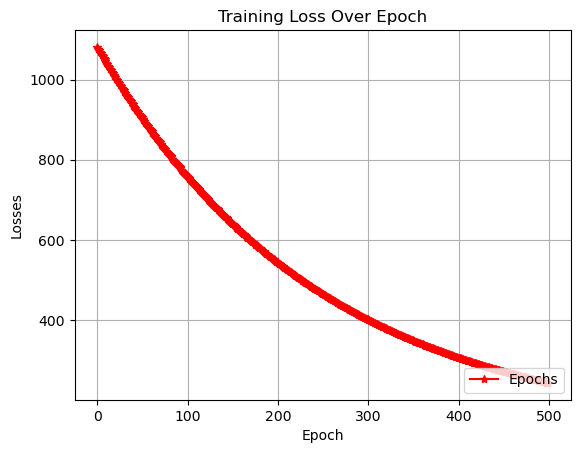

In [8]:
learning_rate = 0.001
losses = []
epochs = 500

for epoch in range(epochs):
    y_pred = predict(X_train)
    loss = mse_loss(y_pred, y_train)
    losses.append(loss.item())

    # backward propagation
    loss.backward()
    # update weight and bias
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad
    
    W.grad.zero_()
    b.grad.zero_()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}: Loss = {loss.item()}')

plt.plot(np.arange(0, 500), losses, color='red', label="Epochs", marker='*')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.title('Training Loss Over Epoch')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show();

✅ This plot helps us understand whether our training procedure is working and whether the learning rate and model parameters are reasonable.

---

## 10. Evaluating Model Performance

Training is complete—but how do we know whether the model actually **learned something meaningful**?

We now test our model on **unseen data** using the **test set** that we held out earlier.  
This step evaluates the model’s ability to **generalize**, meaning it will be able to predict correctly data samples it had not seen during training; and not just memorize.

#### **Why Do We Need a Test Set?**

Training loss only tells us how well the model fits the data it has already seen.

But a model that performs well on training data might:
- Perform poorly on unseen data (⚠️ overfitting), or
- Be too simple and fail on both (⚠️ underfitting)

The **test loss** gives us a better picture of **real-world performance**.

#### **Evaluation Steps**

1. Use the final model (W, b) to predict on `X_test`
2. Compute MSE between predicted and true test values
3. Compare test loss to training loss

#### **Interpreting the Results**

| Observation                      | Diagnosis            |
|----------------------------------|----------------------|
| Both train and test loss high   | ❌ Underfitting       |
| Train loss low, test loss high  | ❌ Overfitting        |
| Both reasonably low             | ✅ Generalization     |

> ✅ We aim for **low loss on both sets**. That’s a sign of a model that has *learned general patterns* in the data.


In [9]:
# Evaluate the model on test set

# Step 1: Predict on test data
y_test_pred = predict(X_test)

# Step 2: Compute MSE on test set
test_loss = mse_loss(y_test_pred, y_test)

print(test_loss)

# Step 3: Print the result
print(f"Test Loss: {test_loss.item():.4f}")


tensor(234.8185, grad_fn=<MeanBackward0>)
Test Loss: 234.8185


> ✅ If the test loss is **close to the training loss**, this suggests that the model generalizes well.

If the test loss is **significantly higher**, the model may have **memorized the training data** instead of learning real patterns.

---

#### 🛠️ Code Task 1.2.10.1: Implement and Evaluate MAE Loss on Test Set

Your task is to:

1. Define a new function named `mae_loss(predictions, targets)` that computes the **Mean Absolute Error (MAE)** using the formula:  
   $$
   \text{MAE} = \frac{1}{n} \sum |y_{\text{true}} - y_{\text{pred}}|
   $$

2. Use this function to compute the test loss from:
   - `X_test` and `y_test` (already defined in the notebook)
   - Use `predict(X_test)` to generate predictions

3. Store the result in a variable named `test_mae_loss`

4. Print the result using `test_mae_loss.item()`

In [10]:
def mae_loss(predictions, targets):
    return torch.mean(abs(predictions - targets))

# test on X_test
y_test_pred = predict(X_test)

# calculate test loss
test_mae_loss = mae_loss(y_test_pred, y_test)

# Step 4: Print result
print(f"Test MAE Loss: {test_mae_loss.item():.4f}")

Test MAE Loss: 12.3744


## 11. Reflection and Summary

🎉 You’ve just completed a full, hands-on walkthrough of **manual linear regression in PyTorch**!

More than just writing code, you’ve built an understanding of:
- What a model actually *is*
- How it learns
- How to monitor and evaluate that learning

#### **What We Built**

We developed a **complete training pipeline** from scratch:

- A **linear model**: $\hat{y} = XW + b$
- A custom **loss function**: Mean Squared Error (MSE)
- A manual **training loop** that:
  - Computes predictions
  - Measures loss
  - Calculates gradients via `.backward()`
  - Updates parameters via gradient descent
  - Tracks and plots loss

#### **What We Learned**

| Core Concept           | What You Now Know                                                 |
|------------------------|-------------------------------------------------------------------|
| Linear Regression      | The simplest building block of neural networks                   |
| PyTorch Tensors        | How to represent and manipulate data, weights, and gradients     |
| Gradient Descent       | How a model learns from loss and adjusts its parameters          |
| Training/Test Split    | How to evaluate generalization, not just memorization            |
| Loss Visualization     | How to monitor and debug the learning process                    |
| Model Evaluation       | How to detect overfitting, underfitting, or generalization       |


#### **Why This Matters**

This notebook has shown you that even the most advanced deep learning models are built on **simple components like this one**.  
A neural network without hidden layers *is* a linear model.

> ✅ Understanding these fundamentals gives us the clarity to build and debug much deeper architectures later.


#### **Flow of Algorithm**

```text
Input Data (X)         Target (y)
      ↓                     ↓
Forward Pass:        ŷ = XW + b
      ↓
Loss Computation:    MSE(ŷ, y)
      ↓
Backward Pass:       .backward()
      ↓
Gradient Descent:    W ← W - α ⋅ ∇W,   b ← b - α ⋅ ∇b
      ↓
Repeat over Epochs → Track & Plot Loss → Evaluate on Test Set
```
#### **What’s Coming Next**

This notebook introduced a model that can only draw **straight lines**.  
But most real-world problems involve **non-linear relationships**!

#### **Up Next, We Will:**

- 🔍 Explore the **limits** of linear models  
- ⚡ Introduce **activation functions** like ReLU  
- 🧱 Build our first **neural network with a hidden layer**

✅ We’re now ready to go from **lines to layers**.

